In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


In [2]:
pd.set_option('display.max_rows',None)
pd.set_option('display.max_columns',None)

In [3]:
train=pd.read_csv(r'C:\Users\Aakas\Downloads\Compressed\home-data-for-ml-course\train.csv')
test=pd.read_csv(r'C:\Users\Aakas\Downloads\Compressed\home-data-for-ml-course\test.csv')

In [4]:
idd=test['Id']
idd

0       1461
1       1462
2       1463
3       1464
4       1465
5       1466
6       1467
7       1468
8       1469
9       1470
10      1471
11      1472
12      1473
13      1474
14      1475
15      1476
16      1477
17      1478
18      1479
19      1480
20      1481
21      1482
22      1483
23      1484
24      1485
25      1486
26      1487
27      1488
28      1489
29      1490
30      1491
31      1492
32      1493
33      1494
34      1495
35      1496
36      1497
37      1498
38      1499
39      1500
40      1501
41      1502
42      1503
43      1504
44      1505
45      1506
46      1507
47      1508
48      1509
49      1510
50      1511
51      1512
52      1513
53      1514
54      1515
55      1516
56      1517
57      1518
58      1519
59      1520
60      1521
61      1522
62      1523
63      1524
64      1525
65      1526
66      1527
67      1528
68      1529
69      1530
70      1531
71      1532
72      1533
73      1534
74      1535
75      1536
76      1537

In [5]:
np.exp(np.log(train.SalePrice))

0       208500.0
1       181500.0
2       223500.0
3       140000.0
4       250000.0
5       143000.0
6       307000.0
7       200000.0
8       129900.0
9       118000.0
10      129500.0
11      345000.0
12      144000.0
13      279500.0
14      157000.0
15      132000.0
16      149000.0
17       90000.0
18      159000.0
19      139000.0
20      325300.0
21      139400.0
22      230000.0
23      129900.0
24      154000.0
25      256300.0
26      134800.0
27      306000.0
28      207500.0
29       68500.0
30       40000.0
31      149350.0
32      179900.0
33      165500.0
34      277500.0
35      309000.0
36      145000.0
37      153000.0
38      109000.0
39       82000.0
40      160000.0
41      170000.0
42      144000.0
43      130250.0
44      141000.0
45      319900.0
46      239686.0
47      249700.0
48      113000.0
49      127000.0
50      177000.0
51      114500.0
52      110000.0
53      385000.0
54      130000.0
55      180500.0
56      172500.0
57      196500.0
58      438780

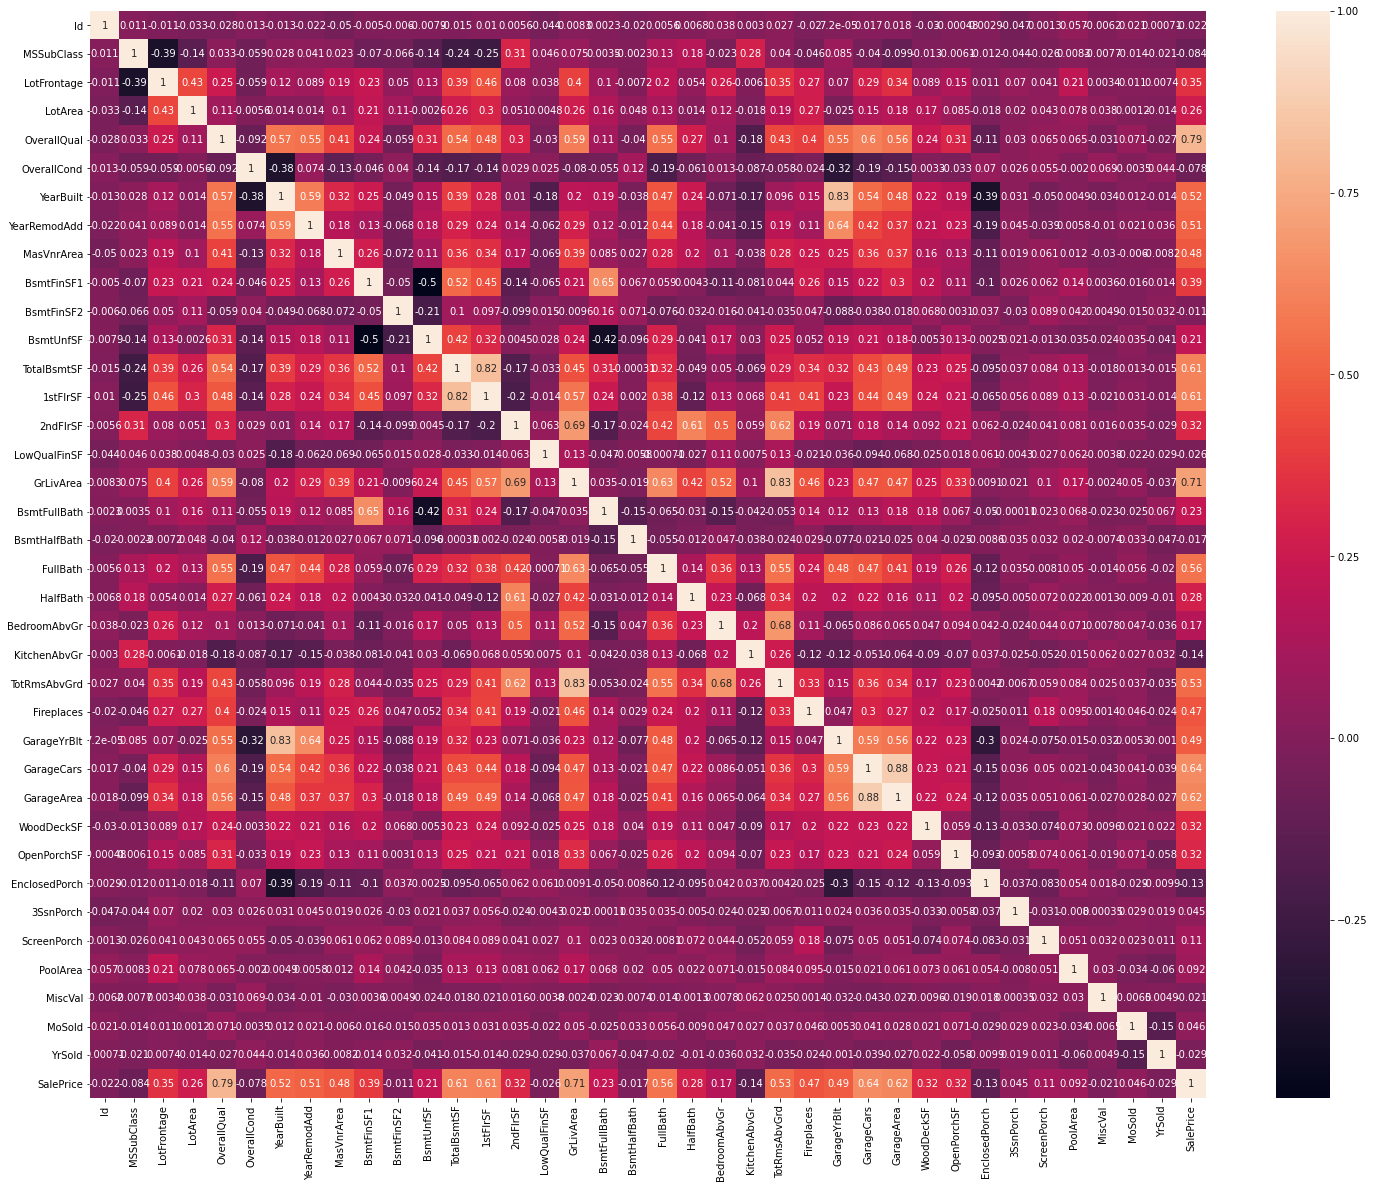

In [6]:
plt.figure(figsize=(25,20))
sns.heatmap(train.corr(),annot=True)

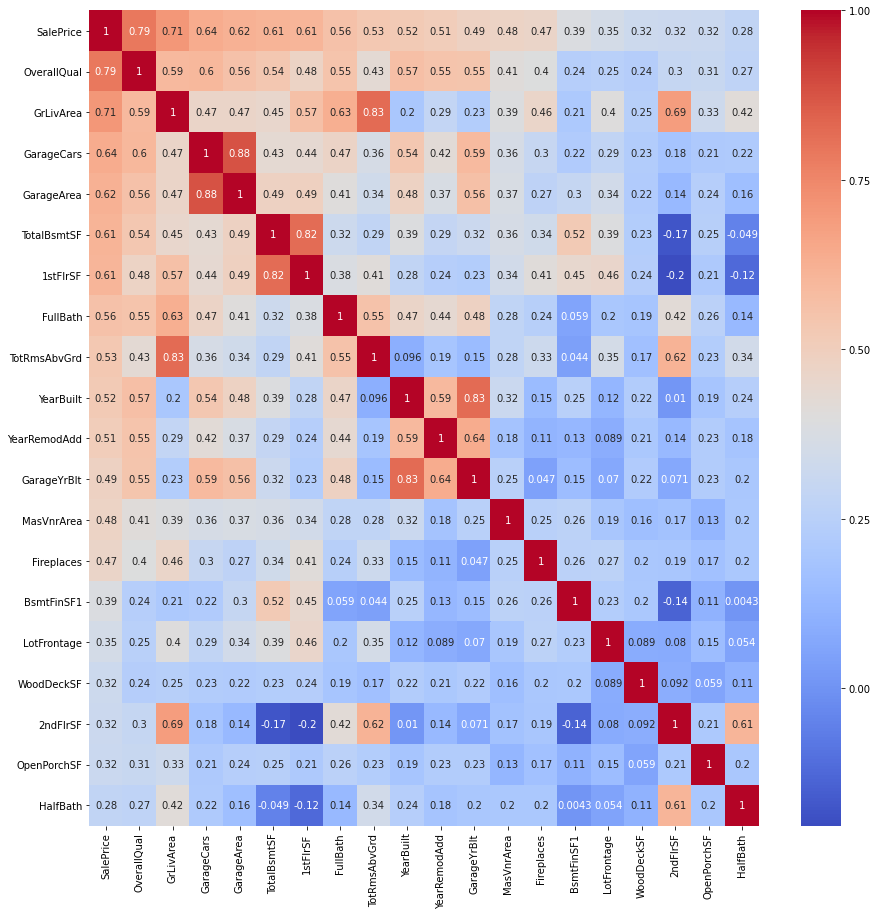

In [7]:
corrmat=train.corr()
plt.figure(figsize=(15,15))
cols=corrmat.nlargest(20,'SalePrice')['SalePrice'].index

sns.heatmap(train[cols].corr(),annot=True,cmap='coolwarm')

From the heatmap we can see the multicollinearity between (GarageArea and GarageCars)  and (1stFlrSF and TotalBsmtSF) so we choose only one of them each. Similarly, (TotRmsAbvGrd and FullBath)

In [8]:

cols=['SalePrice', 'OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', 'FullBath', 'YearBuilt']

Now let's check the scatter plots of these variable with Saleprice

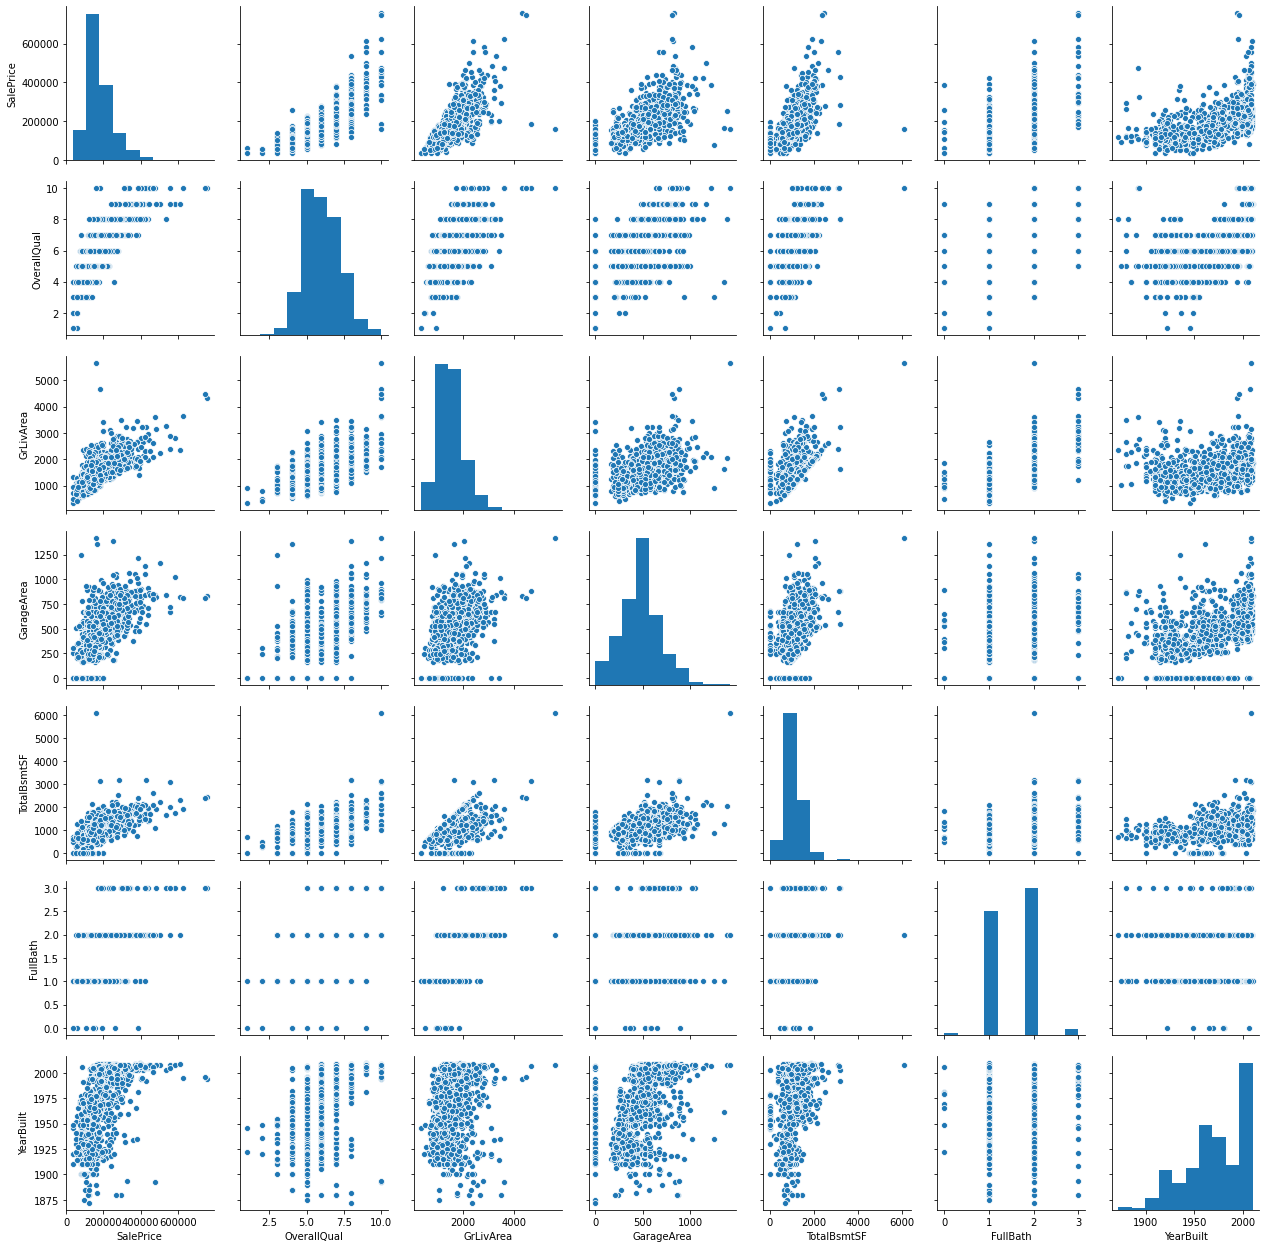

In [9]:
sns.pairplot(train[cols])

##Handling the Missing Data

In [10]:
total=train.isnull().sum().sort_values(ascending=False)
count=len(train)
percent=(train.isnull().sum()/count).sort_values(ascending=False)
missing=pd.concat([total,percent],1,keys=['total','percent'])
missing



,total,percent
PoolQC,1453,0.995205
MiscFeature,1406,0.963014
Alley,1369,0.937671
Fence,1179,0.807534
FireplaceQu,690,0.472603
LotFrontage,259,0.177397
GarageCond,81,0.055479
GarageType,81,0.055479
GarageYrBlt,81,0.055479
GarageFinish,81,0.055479


Dropping all columns with null values exceeding 15%  also they do not have strong correlation with the target variable.
Also also Garage variables are covered with GarageCars having high correlation.
BsmtX are also not important.
All Except Electrical is removed


In [11]:
train.drop(missing[missing['total']>1].index,1,inplace=True)
train.dropna(subset=['Electrical'],inplace=True)

In [12]:
train.isnull().any().sum()

0

In [13]:
missings=test.isnull().sum().sort_values(ascending=False)
test.drop(missings[missings>14].index,1,inplace=True)

In [14]:
test.fillna(method='ffill',inplace=True)
test.isnull().sum().sort_values(ascending=False)

SaleCondition    0
OverallQual      0
BsmtUnfSF        0
BsmtFinSF2       0
BsmtFinSF1       0
Foundation       0
ExterCond        0
ExterQual        0
Exterior2nd      0
Exterior1st      0
RoofMatl         0
RoofStyle        0
YearRemodAdd     0
YearBuilt        0
OverallCond      0
HouseStyle       0
SaleType         0
BldgType         0
Condition2       0
Condition1       0
Neighborhood     0
LandSlope        0
LotConfig        0
Utilities        0
LandContour      0
LotShape         0
Street           0
LotArea          0
MSZoning         0
MSSubClass       0
TotalBsmtSF      0
Heating          0
HeatingQC        0
CentralAir       0
YrSold           0
MoSold           0
MiscVal          0
PoolArea         0
ScreenPorch      0
3SsnPorch        0
EnclosedPorch    0
OpenPorchSF      0
WoodDeckSF       0
PavedDrive       0
GarageArea       0
GarageCars       0
Fireplaces       0
Functional       0
TotRmsAbvGrd     0
KitchenQual      0
KitchenAbvGr     0
BedroomAbvGr     0
HalfBath    

In [15]:
train.shape,test.shape

((1459, 63), (1459, 62))

### Now Outliers

In [16]:
from sklearn.preprocessing import StandardScaler
scaled_saleprice=StandardScaler().fit_transform(train['SalePrice'].values.reshape(-1,1))
low_range=scaled_saleprice[scaled_saleprice[:,0].argsort()][:10]
high_range=scaled_saleprice[scaled_saleprice[:,0].argsort()][-10:]
print('Low range of target variable:')
print(low_range)
print('High range of target variable:')
print(high_range)


Low range of target variable:
[[-1.83820775]
 [-1.83303414]
 [-1.80044422]
 [-1.78282123]
 [-1.77400974]
 [-1.62295562]
 [-1.6166617 ]
 [-1.58519209]
 [-1.58519209]
 [-1.57269236]]
High range of target variable:
[[3.82758058]
 [4.0395221 ]
 [4.49473628]
 [4.70872962]
 [4.728631  ]
 [5.06034585]
 [5.42191907]
 [5.58987866]
 [7.10041987]
 [7.22629831]]


We need to be careful with the two 7x 's which are very much deviated from 0

## Now Bivariate analysis  

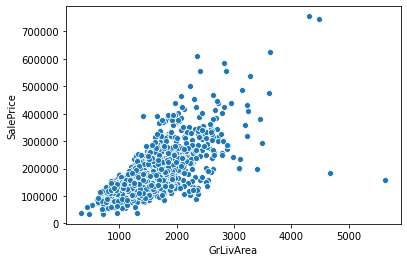

In [17]:
sns.scatterplot(train['GrLivArea'],train['SalePrice'])


The higher GrLivArea seem to be outliers so remove them

In [18]:
groutliers=train['GrLivArea'][train['GrLivArea'].argsort()][-2:]
groutliers

C:\ProgramData\Anaconda3\lib\site-packages\pandas\core\series.py:1143: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#deprecate-loc-reindex-listlike
  return self.loc[key]


523     4676.0
1298    5642.0
Name: GrLivArea, dtype: float64

In [19]:
train.drop(train['GrLivArea'][train['GrLivArea']==4676].index,inplace=True)
train.drop(train['GrLivArea'][train['GrLivArea']==5642].index,inplace=True)


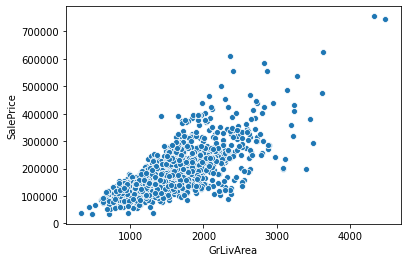

In [20]:
sns.scatterplot(train['GrLivArea'],train['SalePrice'])

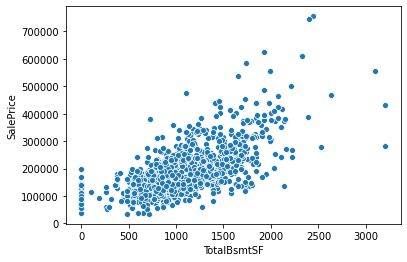

In [21]:
sns.scatterplot(train['TotalBsmtSF'],train['SalePrice'])
# plt.xlim(0,7000)

It seems no outliers

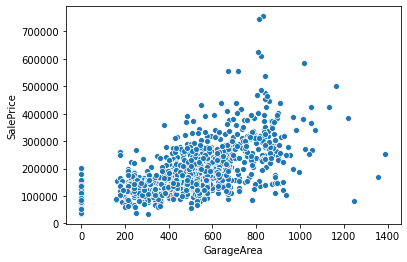

In [22]:
sns.scatterplot(train['GarageArea'],train['SalePrice'])

The 2 farthest points seem to be outliers but we are going to ignore it now

## Analysing the variable distribution 

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74240.99917988207, 180942.13864104328, 0.9320520365889884))

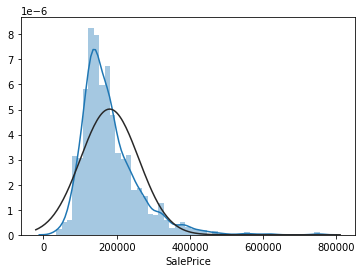

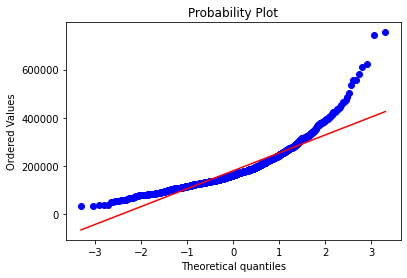

In [23]:

from scipy.stats import norm
from scipy import stats
sns.distplot(train['SalePrice'], fit=norm)
plt.figure()
stats.probplot(train['SalePrice'],plot=plt)

The distribution follows positive skewness and the probability doesnot follow the normal line so, we can solve this using log transformation

In [24]:

# train['SalePrice']=np.log(train['SalePrice'])

In [25]:
# train['SalePrice']

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 34900,  35311,  37900, ..., 625000, 745000, 755000], dtype=int64)),
 (74240.99917988207, 180942.13864104328, 0.9320520365889884))

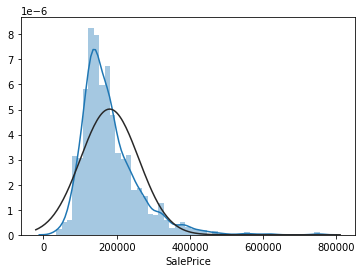

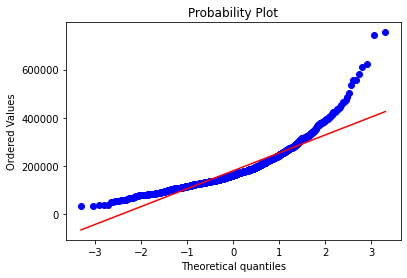

In [26]:
sns.distplot(train['SalePrice'], fit=norm)
plt.figure()
stats.probplot(train['SalePrice'],plot=plt)

Done ! Now let's figure out what's going on with GrLivArea

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([ 334,  438,  480, ..., 3627, 4316, 4476], dtype=int64)),
 (495.8648796248946, 1510.5456417295816, 0.9744141158065238))

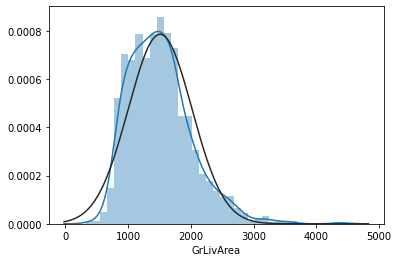

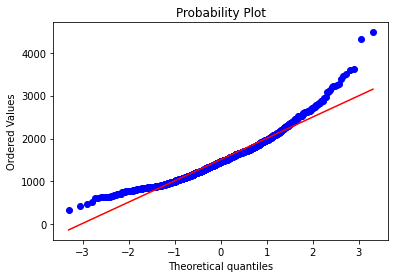

In [27]:
sns.distplot(train['GrLivArea'],fit=norm)
plt.figure()
stats.probplot(train['GrLivArea'],plot=plt)

Seems like a skewness...


In [28]:
train['GrLivArea']=np.log(train['GrLivArea'])
test['GrLivArea']=np.log(test['GrLivArea'])

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([5.81114099, 6.08221891, 6.1737861 , ..., 8.19616114, 8.37008433,
         8.40648507])),
 (0.3304288478350053, 7.266041506402603, 0.9981242998055863))

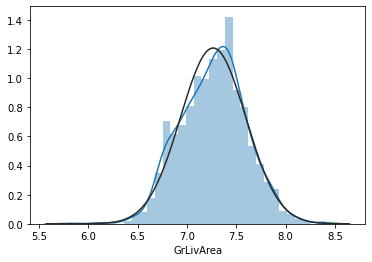

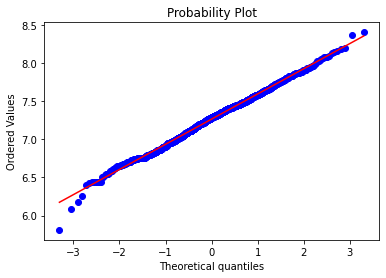

In [29]:
sns.distplot(train['GrLivArea'],fit=norm)
plt.figure()
stats.probplot(train['GrLivArea'],plot=plt)

Abracadabra !

Now again for GarageArea

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([   0,    0,    0, ..., 1248, 1356, 1390], dtype=int64)),
 (210.1914136191114, 472.0995195607413, 0.9884135011043474))

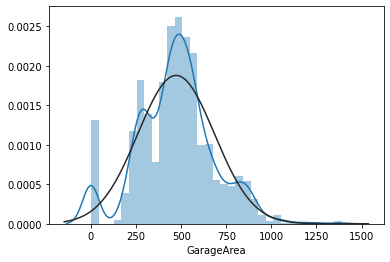

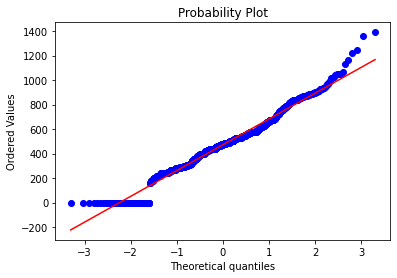

In [30]:
sns.distplot(train['GarageArea'],fit=norm)
plt.figure()
stats.probplot(train['GarageArea'],plot=plt)

Seems ok

((array([-3.30456314, -3.04731426, -2.90425334, ...,  2.90425334,
          3.04731426,  3.30456314]),
  array([   0,    0,    0, ..., 3094, 3200, 3206], dtype=int64)),
 (408.0232985397026, 1052.995881949211, 0.982143593372206))

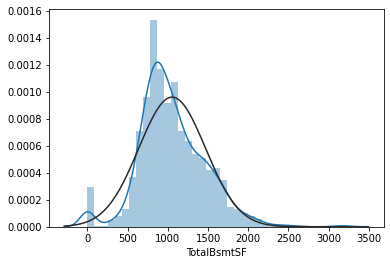

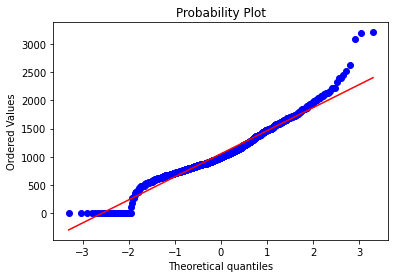

In [31]:
sns.distplot(train['TotalBsmtSF'],fit=norm)
plt.figure()
stats.probplot(train['TotalBsmtSF'],plot=plt)

Here more zero values affects the log transformation so we need to transform all the non zero values only 

## Now working on categorical and numerical variables

In [32]:
target=train['SalePrice'].copy()

train.drop('SalePrice',axis=1,inplace=True)


In [33]:
train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotArea', 'Street', 'LotShape',
       'LandContour', 'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood',
       'Condition1', 'Condition2', 'BldgType', 'HouseStyle', 'OverallQual',
       'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'ExterQual', 'ExterCond', 'Foundation',
       'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'GarageCars', 'GarageArea',
       'PavedDrive', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch',
       'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold', 'SaleType',
       'SaleCondition'],
      dtype='object')

In [34]:

cols=[ 'OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', 'FullBath', 'YearBuilt','TotRmsAbvGrd','2ndFlrSF','Fireplaces']
train=train[cols].copy()
cat_variables=[col for col in train.columns if train[col].dtype=='object']
num_variables=[col for col in train.columns if test[col].dtype in ['int64','float64']]

In [35]:
len(cat_variables),len(num_variables),len(train.columns)

(0, 9, 9)

In [36]:

cols=[ 'OverallQual', 'GrLivArea', 'GarageArea',
       'TotalBsmtSF', 'FullBath', 'YearBuilt']

## Model Selection and Evaluation 

In [37]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train,target,test_size=0.2)

In [38]:
# from sklearn.preprocessing import StandardScaler
# xscaler=StandardScaler()
# yscaler=StandardScaler()

In [39]:
y_train=y_train.values.reshape(-1,1)
y_test=y_test.values.reshape(-1,1)


In [40]:

# X_train=xscaler.fit_transform(X_train)
# X_test=xscaler.transform(X_test)
# y_train=yscaler.fit_transform(y_train)
# y_test=yscaler.transform(y_test)

In [41]:
# yscaler.inverse_transform(y_train)


In [42]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,mean_absolute_error
linreg=LinearRegression()
linreg.fit(X_train,y_train)
pred=linreg.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean Squared Error: 1124956483.4807727
Mean Absolute Error: 25238.394613763598
Root Mean Squared Error: 33540.37095025594


In [43]:
from sklearn.svm import SVR
svr=SVR()
svr.fit(X_train,y_train)
pred=svr.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


Mean Squared Error: 5288832707.217647
Mean Absolute Error: 50370.00334364282
Root Mean Squared Error: 72724.36116747707


In [63]:
# from sklearn.model_selection import GridSearchCV
# grid_params={'C':[0.1,1,3,5,6,7,8,9,10,11,12,13,14,100],'gamma':[0.001,0.01,0.1,1,3,5,10],'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05, 0.1, 0.5, 1, 5, 10]}
# gscv=GridSearchCV(estimator=SVR(),param_grid=grid_params,cv=5,verbose=0,n_jobs=-1,scoring='neg_mean_squared_error')
# gscv.fit(X_train,y_train)


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


GridSearchCV(cv=5, error_score='raise-deprecating',
             estimator=SVR(C=1.0, cache_size=200, coef0=0.0, degree=3,
                           epsilon=0.1, gamma='auto_deprecated', kernel='rbf',
                           max_iter=-1, shrinking=True, tol=0.001,
                           verbose=False),
             iid='warn', n_jobs=-2,
             param_grid={'C': [0.1, 1, 3, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14,
                               100],
                         'epsilon': [0.0001, 0.0005, 0.001, 0.005, 0.01, 0.05,
                                     0.1, 0.5, 1, 5, 10],
                         'gamma': [0.001, 0.01, 0.1, 1, 3, 5, 10]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring='neg_mean_squared_error', verbose=0)

In [64]:
gscv.best_params_

{'C': 100, 'epsilon': 10, 'gamma': 0.001}

In [69]:
gscv.best_score_

-6927546860.656281

In [68]:
best_svr=SVR(gamma=0.001,C=100,epsilon=0.10)
best_svr.fit(X_train,y_train)
pred=best_svr.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))

Mean Squared Error: 5279827018.73052
Mean Absolute Error: 50227.752819228524
Root Mean Squared Error: 72662.4182004048


C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\validation.py:724: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [48]:
# from sklearn.ensemble import RandomForestRegressor
# rf=RandomForestRegressor()
# rf.fit(X_train,y_train)
# pred=rf.predict(X_test)
# print('Mean Squared Error:',mean_squared_error(y_test,pred))
# print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
# print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


In [49]:
# gcv=GridSearchCV(estimator=RandomForestRegressor(),param_grid={'n_estimators':[100,300,400,500,600],'max_depth':[4,5,6,7]},scoring='neg_mean_squared_error',cv=5,n_jobs=-2)
# # gcv.fit(X_train,y_train)

In [50]:
# gcv.best_params_

In [51]:
from sklearn.ensemble import RandomForestRegressor
rf=RandomForestRegressor(max_depth=6,n_estimators=200)
rf.fit(X_train,y_train)
pred=rf.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  This is separate from the ipykernel package so we can avoid doing imports until


Mean Squared Error: 837634076.377402
Mean Absolute Error: 19384.68320315322
Root Mean Squared Error: 28941.908651251768


In [52]:
import xgboost as xgb
model=xgb.XGBRegressor()
model.fit(X_train,y_train)
pred=model.predict(X_test)
print('Mean Squared Error:',mean_squared_error(y_test,pred))
print('Mean Absolute Error:',mean_absolute_error(y_test,pred))
print('Root Mean Squared Error:',np.sqrt(mean_squared_error(y_test,pred)))


Mean Squared Error: 814765358.0135853
Mean Absolute Error: 19682.51856806507
Root Mean Squared Error: 28544.094976257093


In [53]:
# gcv=GridSearchCV(estimator=xgb.XGBRegressor(),param_grid={'n_estimators':[100,200,400,500],'max_depth':[3,4,5,6,7,8],'learning_rate':[0.001,0.01,0.1,1,5,10]},verbose=0,cv=5,n_jobs=-2,scoring='neg_mean_squared_error')

In [54]:
# gcv.fit(X_train,y_train)

## Making the final prediction  

In [55]:
# Xtest=xscaler.transform(test[cols])

In [56]:
pred=best_svr.predict(X_test)
pred

array([164491.7127432 , 164491.75719517, 164491.7559941 , 164491.75594398,
       164491.7559941 , 164491.75772243, 164491.7559941 , 164488.31731466,
       164491.7559941 , 164491.75765472, 164491.75599389, 164491.76199692,
       164483.91551773, 164491.7559941 , 164493.93204879, 164490.90954775,
       164491.7559941 , 164492.20717207, 164490.38218433, 164491.7559941 ,
       164491.7559941 , 164491.75599499, 164491.7559941 , 164499.36563845,
       164491.7559941 , 164491.7902286 , 164496.23476176, 164491.79211731,
       164491.68839878, 164485.98118188, 164491.75599407, 164491.75606321,
       164491.7559941 , 164491.7559941 , 164491.60184301, 164496.82491501,
       164483.69303839, 164481.45542078, 164491.64673191, 164491.75739511,
       164486.00024467, 164491.7559941 , 164491.7559941 , 164491.75587736,
       164486.45057524, 164491.7559941 , 164491.74371119, 164491.75466438,
       164491.7559941 , 164491.75599408, 164491.7559941 , 164491.5621626 ,
       164491.75599413, 1

In [57]:
# invscaledy=yscaler.inverse_transform(pred)

In [58]:
invscaledy=np.exp(pred)
invscaledy

array([inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf,
       inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, inf, in

In [59]:
# invscaledy=pd.Series(invscaledy,name='SalePrice')

In [60]:
# result=pd.concat([idd,invscaledy],1)

In [61]:
# result

In [62]:
# result.to_csv('submission.csv',index=False)